In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.utils import read_sample
from pyclustering.samples.definitions import SIMPLE_SAMPLES
from pyclustering.cluster import cluster_visualizer

In [3]:
from sklearn_extra.cluster import KMedoids

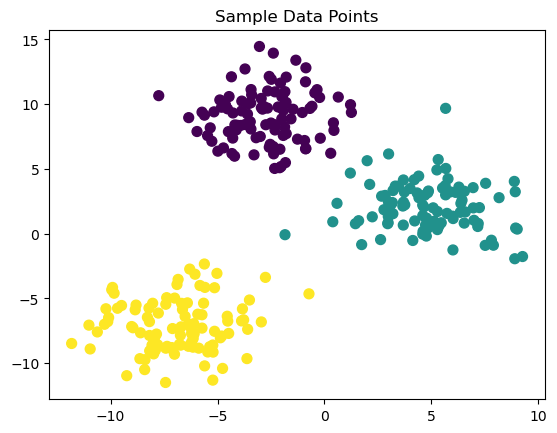

In [4]:
# Generate sample data
X, y = make_blobs(n_samples=300, centers=3, random_state=42, cluster_std=2.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')
plt.title('Sample Data Points')
plt.show()

In [13]:
kmedoids

pyclustering.cluster.kmedoids.kmedoids

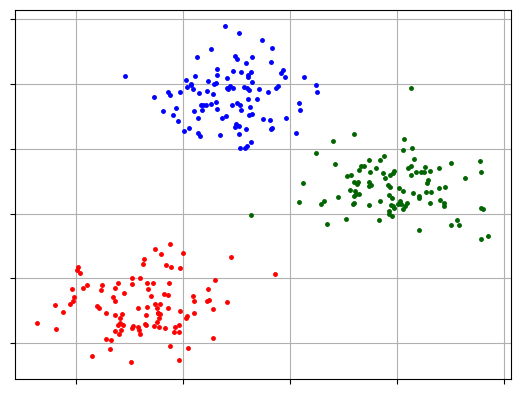

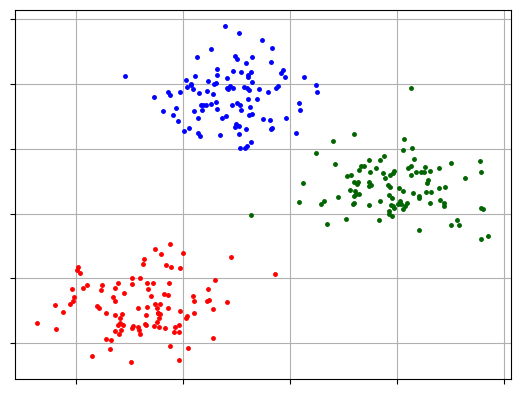

In [9]:
# Initialize K-Medoids with 3 clusters and random initial medoids
initial_medoids = np.random.choice(len(X), 3, replace=False).tolist()
kmedoids_instance = kmedoids(X.tolist(), initial_medoids)
# Run K-Medoids clustering
kmedoids_instance.process()
clusters = kmedoids_instance.get_clusters()
# Visualize the clusters
visualizer = cluster_visualizer()
visualizer.append_clusters(clusters, X.tolist())
visualizer.show()

In [ ]:
def balance_clusters(clusters, desired_size=None):
    """Balance the size of clusters by moving points from larger clusters to smaller ones."""
    if desired_size is None:
        desired_size = sum(len(cluster) for cluster in clusters) // len(clusters)

    overflow = []  # Points that are in clusters that are too large
    underflow = []  # Clusters that are too small

    for cluster in clusters:
        while len(cluster) > desired_size:
            overflow.append(cluster.pop())
        while len(cluster) < desired_size:
            underflow.append(cluster)

    for point in overflow:
        underflow[0].append(point)
        if len(underflow[0]) == desired_size:
            underflow.pop(0)

    return clusters

# Balance the clusters
balanced_clusters = balance_clusters(clusters)

# Visualize the balanced clusters
visualizer = cluster_visualizer()
visualizer.append_clusters(balanced_clusters, X.tolist())
visualizer.show()